<a href="https://colab.research.google.com/github/Jhaveth/Modelaci-n-Financiera/blob/main/Proyecto_Seminario_de_Modelacion_Financiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este programa calcula las siguientes opciones: 

1. Put europea
2. Call europea
3. Put americana
4. Call americana


Ingresa la cantidad de opciones que deseas obtener (1-4) 
1

Ingresa el número de la/s opcion/es que deseas obtener segun el listado del comienzo, (ej: '1' para Put Europea) (una a la vez)
2

Ingrese el número de periodos (n): 
7

Ingrese el tiempo (en meses): 
10

Ingrese el precio actual (So): 
190

Ingrese el precio de ejercicio (k): 
211

Ingrese la tasa (r): 
0.12

¿Cuentas con el valor de la volatilidad? 
 0.No           1. Si    
 1

Ingresa el valor de sigma: 
0.23

Te gustaria comparar modelos? 
1. Si           2. No   
 2

Tus resultados son los siguientes: 

   Tipo:     Valor:    ¿Paridad?         BS
0   Call  15.242830  206.163525  15.467951
1    Put  16.163525  206.163525  16.388646


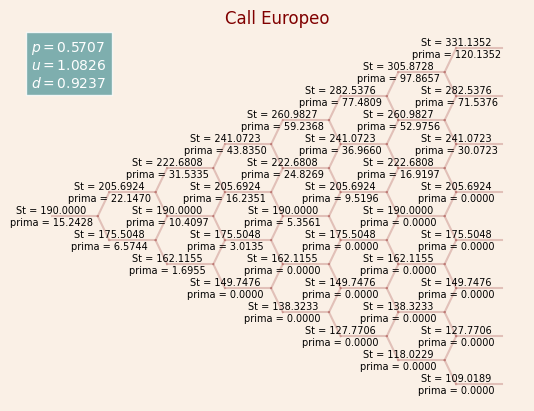


El programa aquí ha terminado 



In [22]:
#Imporamos las librerias
import matplotlib as mpl
from scipy.stats import norm
from math import log, sqrt, exp
import pandas as pd
from numpy.ma.core import maximum
import numpy as np
import matplotlib.pyplot as plt


#Funcion que permite la comparativa entre modelos
def comparar(So, r, k, T, n,tolerancia, comparacion):
    periodo =1
    periodo1=1
    periodo2=1
    if comparacion==1:
        while True:
            u = np.exp(sigma * np.sqrt(T / (12 * periodo)))
            d = 1 / u
            dt = T / (12 * periodo)
            p = (np.exp(r * dt) - d) / (u - d)

            bs_put_value = BS_put(sigma, r, T, k, So)
            binomial_put_value = binomial_valuation(So, r, k, T, periodo, u, d, p, dt, put=True, american=False)[1][0][0]
            diferencia = abs(bs_put_value - binomial_put_value)

            if diferencia < tolerancia:
                break
            periodo += 1

        print(f"\nSe necesitan {periodo} periodos para que la diferencia sea : {diferencia} y asi menor a {tolerancia} en la opción put europea.")

        while True:
            u1 = np.exp(sigma * np.sqrt(T / (12 * periodo1)))
            d1 = 1 / u1
            dt1 = T / (12 * periodo1)
            p1 = (np.exp(r * dt1) - d1) / (u1 - d1)

            #Modelo B&S y binomial
            bs_call_value = BS_call(sigma, r, T, k, So)
            binomial_call_value = binomial_valuation(So, r, k, T, periodo1, u1, d1, p1, dt1, put=False, american=False)[1][0][0]
            #diferencia
            diferencia1 = abs(bs_call_value - binomial_call_value)
            # Verificamos si la diferencia es menor a la tolerancia
            if diferencia1 < tolerancia:
                break
            periodo1 += 1

        print(f"\nSe necesitan {periodo1} periodos para que la diferencia sea : {diferencia} y asi menor a {tolerancia} en la opción call europea.")


    periodos = np.arange(1, n + 1)

    plt.figure(figsize=(12, 8))


    plt.subplot(2, 1, 1)
    bs_put_values = []
    binomial_put_values = []
    for periodo in periodos:
        u = np.exp(sigma * np.sqrt(T / (12 * periodo)))
        d = 1 / u
        dt = T / (12 * periodo)
        p = (np.exp(r * dt) - d) / (u - d)

        # Calculamos los valores del modelo Black-Scholes y binomial
        bs_put_value = BS_put(sigma, r, T, k, So)
        binomial_put_value = binomial_valuation(So, r, k, T, periodo, u, d, p, dt,put=True,american=False)[1][0][0]


        bs_put_values.append(bs_put_value)
        binomial_put_values.append(binomial_put_value)


    plt.plot(periodos, bs_put_values, 'go-',color='#E388D2', markersize=8, label='Black-Scholes')
    plt.plot(periodos, binomial_put_values, 'mo-',color='#0369BF', markersize=8, label='Binomial')
    plt.title('Comparacion de los modelos segun la opcion Put Europea')
    plt.xlabel('Número de Periodos')
    plt.ylabel('Valor de la Opción')
    plt.legend()


    plt.subplot(2, 1, 2)
    bs_call_values = []
    binomial_call_values = []
    for periodo in periodos:
        u = np.exp(sigma * np.sqrt(T / (12 * periodo)))
        d = 1 / u
        dt = T / (12 * periodo)
        p = (np.exp(r * dt) - d) / (u - d)


        bs_call_value = BS_call(sigma, r, T, k, So)
        binomial_call_value = binomial_valuation(So, r, k, T, periodo, u, d, p, dt, put=False,american=False)[1][0][0]


        bs_call_values.append(bs_call_value)
        binomial_call_values.append(binomial_call_value)

    plt.plot(periodos, bs_call_values, 'go-',color='#E388D2', markersize=8, label='Black-Scholes (Call)')
    plt.plot(periodos, binomial_call_values, 'mo-',color='#0369BF',markersize=8, label='Binomial (Call)')
    plt.title('Comparacion de los modelos segun la opcion Call Europea')
    plt.xlabel('Número de Periodos')
    plt.ylabel('Valor de la Opción')
    plt.legend()
    plt.tight_layout()
    plt.show()

    if comparacion==2:
        print("\nEl valor del put americano no converge, como lo puedes ver en la grafica")

        while True:
            u2 = np.exp(sigma * np.sqrt(T / (12 * periodo2)))
            d2 = 1 / u2
            dt2 = T / (12 * periodo2)
            p2 = (np.exp(r * dt2) - d2) / (u2 - d2)

            bs_call_value = BS_call(sigma, r, T, k, So)
            binomial_call_value = binomial_valuation(So, r, k, T, periodo2, u2, d2, p2, dt2, put=False, american=True)[1][0][0]
            diferencia2 = abs(bs_call_value - binomial_call_value)
            if diferencia2 < tolerancia:
                break

            periodo2 += 1

        print(f"\nSe necesitan {periodo2} periodos para que la diferencia sea : {diferencia2} y asi menor a {tolerancia} en la opción call americano.")

    periodos = np.arange(1, n + 1)

    plt.figure(figsize=(12, 8))


    plt.subplot(2, 1, 1)
    bs_put_values = []
    binomial_put_values = []
    for periodo in periodos:
        u = np.exp(sigma * np.sqrt(T / (12 * periodo)))
        d = 1 / u
        dt = T / (12 * periodo)
        p = (np.exp(r * dt) - d) / (u - d)
        bs_put_value = BS_put(sigma, r, T, k, So)
        binomial_put_value = binomial_valuation(So, r, k, T, periodo, u, d, p, dt,put=True,american=True)[1][0][0]
        bs_put_values.append(bs_put_value)
        binomial_put_values.append(binomial_put_value)

    # Graficamos valores
    plt.plot(periodos, bs_put_values, 'go-',color='#E388D2', markersize=8, label='Black-Scholes')
    plt.plot(periodos, binomial_put_values, 'mo-',color='#0369BF', markersize=8, label='Binomial')
    plt.title('Comparativa de los modelos segun la opcion Put Americana')
    plt.xlabel('Número de Periodos')
    plt.ylabel('Valor de la Opción')
    plt.legend()

    # Graficamos la opción call
    plt.subplot(2, 1, 2)
    bs_call_values = []
    binomial_call_values = []
    for periodo in periodos:
        u = np.exp(sigma * np.sqrt(T / (12 * periodo)))
        d = 1 / u
        dt = T / (12 * periodo)
        p = (np.exp(r * dt) - d) / (u - d)

        # Calculamos los valores del modelo B&S y binomial
        bs_call_value = BS_call(sigma, r, T, k, So)
        binomial_call_value = binomial_valuation(So, r, k, T, periodo, u, d, p, dt, put=False,american=True)[1][0][0]
        bs_call_values.append(bs_call_value)
        binomial_call_values.append(binomial_call_value)

    # Graficamos los valores
    plt.plot(periodos, bs_call_values, 'go-', color='#E388D2', markersize=8, label='Black-Scholes (Call)')
    plt.plot(periodos, binomial_call_values, 'mo-',color='#0369BF', markersize=8, label='Binomial (Call)')
    plt.title('Comparativa de los modelos segun la opcion Call Americana')
    plt.xlabel('Número de Periodos')
    plt.ylabel('Valor de la Opción')
    plt.legend()
    plt.tight_layout()
    plt.show()

#función que realiza el cálculo de B&S para una opción put
def BS_put(sigma, r, T, k, So):
    d1 = ((log(So / k)) + (r + (sigma**2) / 2) * (T / 12)) / (sigma * sqrt(T / 12))
    d2 = d1 - (sigma * sqrt(T / 12))
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    put = k * exp(-r * (T / 12)) * (1 - Nd2) - So * (1 - Nd1)
    return put

#función que realiza el cálculo de B&S para una opción call
def BS_call(sigma, r, T, k, So):
    d1 = ((log(So / k)) + (r + (sigma**2) / 2) * (T / 12)) / (sigma * sqrt(T / 12))
    d2 = d1 - (sigma * sqrt(T / 12))
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    call = So * Nd1 - ((k * exp(-r * (T / 12)) * Nd2))
    return call

#funcion que nos ayuda a determinar los valores que tendremos en cada nodo
def binomial_valuation(So, r, k, T, n,  u, d, p, dt, put : bool = True, american : bool = True):

  cons = np.exp(-r*dt) # valor presente

  # Creamos arbol de precios
  price_tree = np.zeros([n + 1, n + 1])
  for j in range(n + 1):
    for i in range(j + 1):
        price_tree[i, j] = So * u ** (j - i) * d ** i

  # Creamos arbol de la prima
  prime_tree = np.zeros([n+1,n+1])

  if put:
    prime_tree[: , n] = np.maximum(np.zeros(n+1), k - price_tree[:, n])
  else:
    prime_tree[: , n] = np.maximum(np.zeros(n+1), price_tree[:, n] - k)

  for i in np.arange(n-1, -1, -1):
    for j in np.arange(i+1):
              prime_tree[j, i] = cons*(p*prime_tree[j, i+1] + (1-p)*prime_tree[j+1, i+1])
    if put and american:
      prime_tree[:i+1, i] = np.maximum(prime_tree[:i+1, i], k - price_tree[:i+1 , i], np.zeros(i+1))
    elif not put and american:
      prime_tree[:i+1, i] = np.maximum(prime_tree[:i+1, i], price_tree[:i+1 , i] - k, np.zeros(i+1))



  return price_tree,prime_tree


def MakePoints(n):
  mult = 0
  Xlist = []
  Point_list = []

  for i in range(2*(n+1)):
    if i%2 == 0:
      Xlist.append(5*mult+1)
      mult += 1
    else:
      Xlist.append(5*mult)

  for i in range(n+1):
    value = 2*(n+1+i)
    xindex1 = 2*i
    xindex2 = 2*i + 1
    Point_list.append([Xlist[xindex1],value])
    Point_list.append([Xlist[xindex2],value])
    for j in range(i):
      value -= 4
      Point_list.append([Xlist[xindex1],value])
      Point_list.append([Xlist[xindex2],value])
  return Point_list


def Conexion(List, inicio, final, color : str = '#800000'):
  plt.plot((List[inicio][0], List[final][0]), (List[inicio][1], List[final][1]), color = '#800000',alpha=0.2) #La variable alpha nos dice que tan oscura se vera la linea que une nuestros nodos de forma vertical


def Nodo(List, nodo, value, value2, color: str = '#800000'):
    texto = "St = {:.4f}\nprima = {:.4f}".format(value, value2)
    plt.plot((List[nodo][0], List[nodo + 1][0]), (List[nodo][1], List[nodo + 1][1]), color='#800000',alpha=0.2) #La variable alpha nos dice que tan oscura se vera la linea que une nuestros nodos
    plt.annotate(texto, (List[nodo][0], List[nodo + 1][1]), color="black", ha='center', va='center', fontsize=7) #Esta parte es sobre los valores que mostramos en nuestra grafica, se puede ajustar el tamaño de la letra aumentando o disminuyendo el valor de fontsize


def Nodoa(List, nodo, value, value2, value3, color: str = '#800000'):
    texto = "St = {:.4f}\nprima = {:.4f}\nprima* = {:.4f}".format(value, value2, value3)
    plt.plot((List[nodo][0], List[nodo + 1][0]), (List[nodo][1], List[nodo + 1][1]), color='#800000',alpha=0.2) #La variable alpha nos dice que tan oscura se vera la linea que une nuestros nodos
    plt.annotate(texto, (List[nodo][0], List[nodo + 1][1]), color="black", ha='center', va='center', fontsize=7) #Esta parte es sobre los valores que mostramos en nuestra grafica, se puede ajustar el tamaño de la letra aumentando o disminuyendo el valor de fontsize


#Pedimos al usuario que nos dia cuantas opciones quiere calcular con los datos ingresados y que tipo
print("Este programa calcula las siguientes opciones: ")
print("\n1. Put europea\n2. Call europea\n3. Put americana\n4. Call americana\n")
opciones=int(input("\nIngresa la cantidad de opciones que deseas obtener (1-4) \n"))
busco=[]

#Creamos un ciclo que nos guardara las opciones que queremos
for i in range(opciones):
    opciones=int(input("\nIngresa el número de la/s opcion/es que deseas obtener segun el listado del comienzo, (ej: '1' para Put Europea) (una a la vez)\n"))
    busco.append(opciones)
busco.sort()

#Pedimos al usuario que ingrese los valores de acuerdo a lo que requiera
n = int(input("\nIngrese el número de periodos (n): \n"))
T = int(input("\nIngrese el tiempo (en meses): \n"))
So = float(input("\nIngrese el precio actual (So): \n"))
k = float(input("\nIngrese el precio de ejercicio (k): \n"))
r = float(input("\nIngrese la tasa (r): \n"))


#Creamos una pregunta que ayudara al usuario a ingresar su valor de sigma o los valores u y d, segun sea el caso
pregunta=float(input("\n¿Cuentas con el valor de la volatilidad? \n 0.No           1. Si    \n "))
if pregunta==0: #Si no tiene el valor de sigma, le pedimos al usuario que ingrese su valor de u y d
    u=float(input("\nIngresa el valor de u: "))
    d=float(input("\nIngresa el valor de d: "))
if pregunta==1: #Si lo tiene, le pedimos que ingrese su valor de sigma y asi, calculamos nuestra u y d apartir de eso
    sigma=float(input("\nIngresa el valor de sigma: \n"))
    u=np.exp(sigma*np.sqrt(T/(12*n)))
    d=1/u

#pregunta, que ayudara al usuario a responder si quiere comparar ambos modelos
pregunta2=int(input("\nTe gustaria comparar modelos? \n1. Si           2. No   \n "))

#Apartir de lo obtenido, calculamos nuestra dt y p
dt = T/(12*n)
p = (np.exp(r*dt)-d)/(u-d)

#Creamos un ciclo que segun nuestra opcion deseada, nos creara una ventana con nuestro arbol
for j in busco:
    fig, ax = plt.subplots()
    fig.set_facecolor('#FAF0E6')
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color='#F08080')
    point_list = MakePoints(n)

    i = 0
    ic = -1
    f = 0

    if j==1:
        nombre="Put Europeo"
        Valuation=binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)
        if pregunta==0:
            resultado={"Tipo: ": ["Put","Call"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0],binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = False)[1][0][0]],"¿Paridad?":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0]+So,binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = False)[1][0][0]+k*exp(-r*T/12)]}
        if pregunta==1:
            resultado={"Tipo: ": ["Put","Call"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0],binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = False)[1][0][0]],"¿Paridad?":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0]+So,binomial_valuation(So, r, k, T, n, u, d, p, dt,put = False, american = False)[1][0][0]+k*exp(-r*T/12)],"BS":[BS_put(sigma, r, T, k, So),BS_call(sigma, r, T, k, So)]}
        final=pd.DataFrame(resultado)
        print("\nTus resultados son los siguientes: \n\n",final)
        for nodo in range(n+1):
          if nodo > 0:
            up = True
            f += 2
            for conexion in range(2*nodo):
              if up:
                up = False
                ic += 2
              else:
                up = True
                f += 2
              Conexion(point_list, ic, f)
          for recta in range(nodo+1):
              Nodo(point_list, i,Valuation[0][recta,nodo],Valuation[1][recta,nodo])
              i += 2
        plt.text(0.005, 0.85, f'$p = {p:.4f}$\n$u = {u:.4f}$\n$d = {d:.4f}$', color='white', transform=ax.transAxes, bbox=dict(facecolor='#5F9EA0', edgecolor='white', alpha=0.8))
        plt.title(nombre,color="#800000")
        plt.axis('off')
        plt.show()
    if j==2:
        nombre="Call Europeo"
        Valuation = binomial_valuation(So, r, k, T, n,  u, d, p, dt,put = False, american = False)
        if pregunta==0:
            resultado={"Tipo: ": ["Call","Put"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d, p, dt,put = False, american = False)[1][0][0],binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0]],"¿Paridad?":[binomial_valuation(So, r, k, T, n, u, d, p, dt,put = False, american = False)[1][0][0]+k*exp(-r*T/12),binomial_valuation(So, r, k, T, n, u, d, p, dt,put = True, american = False)[1][0][0]+So]}
        if pregunta==1:
            resultado={"Tipo: ": ["Call","Put"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = False)[1][0][0],binomial_valuation(So, r, k, T, n, u, d, p, dt,put = True, american = False)[1][0][0]],"¿Paridad?":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = False)[1][0][0]+k*exp(-r*T/12),binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = False)[1][0][0]+So],"BS":[BS_call(sigma, r, T, k, So),BS_put(sigma, r, T, k, So)]}
        final=pd.DataFrame(resultado)
        print("\nTus resultados son los siguientes: \n\n",final)
        for nodo in range(n+1):
          if nodo > 0:
            up = True
            f += 2
            for conexion in range(2*nodo):
              if up:
                up = False
                ic += 2
              else:
                up = True
                f += 2
              Conexion(point_list, ic, f)
          for recta in range(nodo+1):
              Nodo(point_list, i, Valuation[0][recta,nodo],Valuation[1][recta,nodo])
              i += 2
        plt.text(0.005, 0.85, f'$p = {p:.4f}$\n$u = {u:.4f}$\n$d = {d:.4f}$', color='white', transform=ax.transAxes, bbox=dict(facecolor='#5F9EA0', edgecolor='white', alpha=0.8))
        plt.title(nombre,color="#800000")
        plt.axis('off')
        plt.show()

    if j==3:
        nombre="Put Americano"
        aValuation = binomial_valuation(So, r, k, T, n,  u, d,p, dt, put = True, american = False)
        aValuation1 = binomial_valuation(So, r, k, T, n,  u, d, p, dt,put = True, american = True)[1]
        resultado={"Tipo: ": ["Put","Call"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = True)[1][0][0],binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = True)[1][0][0]]}
        final=pd.DataFrame(resultado)
        print("\nTus resultados son los siguientes: \n\n",final)
        for nodo in range(n+1):
          if nodo > 0:
            up = True
            f += 2
            for conexion in range(2*nodo):
              if up:
                up = False
                ic += 2
              else:
                up = True
                f += 2
              Conexion(point_list, ic, f)
          for recta in range(nodo+1):
              Nodoa(point_list, i, aValuation[0][recta,nodo],aValuation[1][recta,nodo],aValuation1[recta,nodo])
              i += 2
        plt.text(0.005, 0.85, f'$p = {p:.4f}$\n$u = {u:.4f}$\n$d = {d:.4f}$', color='white', transform=ax.transAxes, bbox=dict(facecolor='#5F9EA0', edgecolor='white', alpha=0.8))
        plt.title(nombre,color="#800000")
        plt.axis('off')
        plt.show()

    if j==4:
        nombre="Call Americano"
        aValuation = binomial_valuation(So, r, k, T, n,  u, d, p, dt,put = False, american = False)
        aValuation1 = binomial_valuation(So, r, k, T, n,  u, d,p, dt, put = False, american = True)[1]
        resultado={"Tipo: ": ["Call","Put"], "Valor: ":[binomial_valuation(So, r, k, T, n, u, d,p, dt, put = False, american = True)[1][0][0],binomial_valuation(So, r, k, T, n, u, d,p, dt, put = True, american = True)[1][0][0]]}
        final=pd.DataFrame(resultado)
        print("\nRESULTADOS \n\n",final)
        for nodo in range(n+1):
          if nodo > 0:
            up = True
            f += 2
            for conexion in range(2*nodo):
              if up:
                up = False
                ic += 2
              else:
                up = True
                f += 2
              Conexion(point_list, ic, f)
          for recta in range(nodo+1):
              Nodoa(point_list, i, aValuation[0][recta,nodo],aValuation[1][recta,nodo],aValuation1[recta,nodo])
              i += 2
        plt.text(0.005, 0.85, f'$p = {p:.4f}$\n$u = {u:.4f}$\n$d = {d:.4f}$', color='white', transform=ax.transAxes, bbox=dict(facecolor='#5F9EA0', edgecolor='white', alpha=0.8))
        plt.title(nombre,color="#800000")
        plt.axis('off')
        plt.show()


if pregunta2==1:
    comparacion=int(input("\n¿Cual de los modelos deseas comparar? \n1. Europeos           2. Americanos                R: "))
    tolerancia=float(input("\nDigita la tolerancia: "))
    comparar(So, r, k, T, 100, tolerancia,comparacion)
else:
    print("\nEl programa aquí ha terminado \n")